In [1]:
import pandas as pd
from limpieza_datos import *

df_int_login = pd.read_csv("https://desafiogrupo1.s3.us-east-1.amazonaws.com/df1_alimentacion.csv")
df_ddos = pd.read_csv("https://desafiogrupo1.s3.us-east-1.amazonaws.com/df_alimentacion_DDOS.csv")
df_phishing = pd.read_csv("https://desafiogrupo1.s3.us-east-1.amazonaws.com/df_alimentacion_phising.csv")


In [8]:
df_int_login.iloc[10].to_dict()

{'index': 910396,
 'Login Timestamp': '2020-02-15 12:29:39.965',
 'User ID': -8343719474777979904,
 'Round-Trip Time [ms]': nan,
 'IP Address': '176.124.63.200',
 'Country': 'NO',
 'Region': 'Troms og Finnmark',
 'City': 'Hammerfest',
 'ASN': 200665,
 'User Agent String': 'Mozilla/5.0 (Linux; U; Android 13.0; i phone X Build/NRD90M; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/85.0.4183.127 Mobile Safari/537.36 OPR/52.1.2254.54298',
 'Browser Name and Version': 'Opera Mobile 52.1.2254',
 'OS Name and Version': 'Android 13.0',
 'Device Type': 'mobile',
 'Login Successful': True,
 'Is Attack IP': False,
 'Is Account Takeover': False}

In [ ]:
def malware_type_detection(dict):
    if 'FILENAME' in dict.keys():
        clean_data_phishing(dict)
    elif 'Destination Port' in dict.keys():
        clean_data_ddos(dict)
    else:
        clean_data_login(dict)

In [3]:
malware_type_detection(df_phishing.iloc[10].to_dict())
malware_type_detection(df_ddos.iloc[20].to_dict())
malware_type_detection(df_int_login.iloc[32].to_dict())

[DB] Insertado 1 registro(s) en logs.


In [3]:
for i in range(df_ddos.shape[0]):
    clean_data_ddos2(df_ddos.iloc[i].to_dict())

In [2]:
df_ddos.shape[0]

106

In [44]:
login_list =[]
for i in range(100):
    login_list.append(df_int_login.iloc[i].to_dict())

for i in range(100):
    login_list.append(df_ddos.iloc[i].to_dict())

for i in range(100):
    login_list.append(df_ddos.iloc[i].to_dict())


In [45]:
login_list[243]

{'Destination Port': 53,
 'Flow Duration': 205,
 'Total Fwd Packets': 2,
 'Total Backward Packets': 2,
 'Total Length of Fwd Packets': 88,
 'Flow Bytes/s': '1.346.341.463',
 'Flow Packets/s': '1.951.219.512',
 'Fwd Packet Length Max': 44,
 'Fwd Packet Length Min': 44,
 'Fwd Packet Length Mean': '44',
 'SYN Flag Count': 0,
 'ACK Flag Count': 0,
 'RST Flag Count': 0,
 'PSH Flag Count': 0,
 'URG Flag Count': 0,
 'CWE Flag Count': 0,
 'ECE Flag Count': 0,
 'Down/Up Ratio': 1,
 'Subflow Fwd Packets': 2,
 'Subflow Bwd Packets': 2,
 'Active Mean': '0',
 'Active Max': 0,
 'Active Min': 0,
 'Idle Mean': '0',
 'Idle Max': 0,
 'Idle Min': 0}

In [4]:
import psycopg2

# Credenciales
DB_USER = "desafiogrupo1_user"
DB_HOST = "dpg-d36i177fte5s73bgaisg-a.oregon-postgres.render.com"
DB_NAME = "desafiogrupo1"
DB_PASS = "g7jS0htW8QqiGPRymmJw0IJgb04QO3Jy"
DB_PORT = "5432"

try:
    # Crear conexión
    conn = psycopg2.connect(
        dbname=DB_NAME,
        user=DB_USER,
        password=DB_PASS,
        host=DB_HOST,
        port=DB_PORT
    )

    # Crear cursor
    cur = conn.cursor()

    # Probar con una consulta
    cur.execute("SELECT * FROM logs ORDER BY ID DESC LIMIT 106;")
    cur.fetchone()
    for row in cur.fetchall():
        print(row)

    # Cerrar
    cur.close()
    conn.close()

except Exception as e:
    print("Error de conexión:", e)


(954, 1, 'Nuevo', 'Incidencia', 'Sql Injection', 3, datetime.date(2025, 9, 23), datetime.time(12, 16, 39), '1')
(953, 1, 'Nuevo', 'Incidencia', 'Sql Injection', 3, datetime.date(2025, 9, 23), datetime.time(12, 16, 37), '1')
(952, 1, 'Nuevo', 'Incidencia', 'Sql Injection', 3, datetime.date(2025, 9, 23), datetime.time(12, 16, 36), '1')
(951, 1, 'Nuevo', 'Incidencia', 'Sql Injection', 3, datetime.date(2025, 9, 23), datetime.time(12, 16, 34), '1')
(950, 1, 'Nuevo', 'Incidencia', 'Sql Injection', 3, datetime.date(2025, 9, 23), datetime.time(12, 16, 33), '1')
(949, 1, 'Nuevo', 'Incidencia', 'Sql Injection', 3, datetime.date(2025, 9, 23), datetime.time(12, 16, 32), '1')
(948, 1, 'Nuevo', 'Incidencia', 'Sql Injection', 3, datetime.date(2025, 9, 23), datetime.time(12, 16, 30), '1')
(947, 1, 'Nuevo', 'Incidencia', 'Sql Injection', 3, datetime.date(2025, 9, 23), datetime.time(12, 16, 29), '1')
(946, 1, 'Nuevo', 'Incidencia', 'Sql Injection', 3, datetime.date(2025, 9, 23), datetime.time(12, 16, 27

C:\Users\Vicen\AppData\Local\Temp\ipykernel_6548\3732104255.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


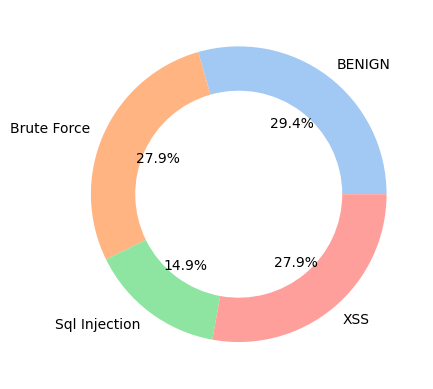

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

conn = psycopg2.connect(
    dbname="desafiogrupo1",
    user="desafiogrupo1_user",
    password="g7jS0htW8QqiGPRymmJw0IJgb04QO3Jy",
    host="dpg-d36i177fte5s73bgaisg-a.oregon-postgres.render.com",
    port="5432"
    )

cur = conn.cursor()
query = """
SELECT *
FROM public.logs
WHERE indicators IN ('BENIGN', 'XSS', 'Brute Force', 'Sql Injection')
;
"""

df = pd.read_sql(query, conn)
df_group = df.groupby('indicators')['severity'].size().reset_index(name='total')


plt.pie(df_group['total'], labels=df_group['indicators'], colors=sns.color_palette("pastel"), wedgeprops=dict(width=0.3), autopct='%1.1f%%' )
plt.show()
conn.close()

In [ ]:
import requests
from flask import send_file, request
import io


from flask import Flask, request, jsonify, send_file, send_from_directory
from flask_cors import CORS
from datetime import datetime
import os

def download_pdf():
    from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer
    from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
    from reportlab.lib.pagesizes import A4
    from reportlab.lib.enums import TA_JUSTIFY
    data = request.get_json()
    theme = data.get("theme", "Sin tema")
    character = data.get("character", "Sin personaje")
    tone = data.get("tone", "Normal")
    story = data.get("story", "")

    buffer = io.BytesIO()
    
    # Documento A4 con márgenes
    doc = SimpleDocTemplate(
        buffer,
        pagesize=A4,
        rightMargin=40,
        leftMargin=40,
        topMargin=40,
        bottomMargin=40
    )

    styles = getSampleStyleSheet()
    justify_style = ParagraphStyle(
        'Justify',
        parent=styles['Normal'],
        alignment=TA_JUSTIFY,
        leading=15 
    )

    story_elements = []
    story_elements.append(Paragraph(f"<b>Tema:</b> {theme}", styles["Heading3"]))
    story_elements.append(Paragraph(f"<b>Personaje:</b> {character}", styles["Normal"]))
    story_elements.append(Paragraph(f"<b>Tono:</b> {tone}", styles["Normal"]))
    story_elements.append(Spacer(1, 12))

    # Convertir saltos de línea en <br/> para que respeten el formato
    story_html = story.replace("\n", "<br/>")
    story_elements.append(Paragraph("<b>Cuento:</b>", styles["Heading3"]))
    story_elements.append(Paragraph(story_html, justify_style))

    doc.build(story_elements)
    buffer.seek(0)

    return send_file(
        buffer,
        as_attachment=True,
        download_name=f"cuento_{theme.replace(' ', '_')}.pdf",
        mimetype="application/pdf"
    )

In [4]:
from limpieza_datos2 import *

for i in range(5):
    limpieza_phishing(df_phishing.iloc[i].to_dict())

[{'URL': 'http://www.oshgiutn.gq',
  'status': 'URL NO REPORTADA',
  'malicious': None,
  'suspicious': None,
  'undetected': None,
  'harmless': None,
  'timeout': None,
  'whois': None,
  'tags': None,
  'dns_records': [],
  'last_dns_records_date': None,
  'registrar': None,
  'expiration_date': None,
  'tld': None,
  'issuer': None,
  'subject_CN': None,
  'cert_not_before': None,
  'cert_not_after': None,
  'cert_key_size': None,
  'thumbprint_sha256': None,
  'popularity_ranks': None,
  'jarm': None,
  'categories': None}]

[{'type': 'Alerta',
  'indicators': 'Posible phishing',
  'severity': 1,
  'date': datetime.date(2025, 9, 24),
  'time': '10:13:22'}]

[{'URL': 'https://www.solder.party',
  'status': 'OK',
  'malicious': 0,
  'suspicious': 0,
  'undetected': 28,
  'harmless': 68,
  'timeout': 0,
  'whois': 'Admin City: REDACTED FOR PRIVACY\nAdmin Country: REDACTED FOR PRIVACY\nAdmin Organization: REDACTED FOR PRIVACY\nAdmin Postal Code: REDACTED FOR PRIVACY\nAdmin State/Province: REDACTED FOR PRIVACY\nCreation Date: 2018-10-07T08:38:09Z\nDNSSEC: unsigned\nDomain Name: solder.party\nDomain Status: clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited\nDomain Status: clientTransferProhibited https://icann.org/epp#clientTransferProhibited\nName Server: ns1.digitalocean.com\nName Server: ns2.digitalocean.com\nName Server: ns3.digitalocean.com\nRegistrant City: 1f8f4166599d23ee\nRegistrant Country: FR\nRegistrant Country: PL\nRegistrant Email: 46860fe85ca2a91ds@\nRegistrant Email: f651612a2f356ad3s@\nRegistrant Fax Ext: 1f8f4166599d23ee\nRegistrant Fax: 1f8f4166599d23ee\nRegistrant Name: 1f8f4166599d23ee\nRegistrant Organiza

[{'type': 'Alerta',
  'indicators': 'Posible phishing',
  'severity': 1,
  'date': datetime.date(2025, 9, 24),
  'time': '10:13:27'}]

[{'URL': 'https://www.toysnbricks.com',
  'status': 'OK',
  'malicious': 0,
  'suspicious': 0,
  'undetected': 28,
  'harmless': 68,
  'timeout': 0,
  'whois': 'Admin City: Reykjavik\nAdmin Country: IS\nAdmin Email: 51263c0b67d19f47s@withheldforprivacy.com\nAdmin Organization: Privacy service provided by Withheld for Privacy ehf\nAdmin Postal Code: 101\nAdmin State/Province: Capital Region\nCreation Date: 2009-04-17T22:06:34.00Z\nCreation Date: 2009-04-17T22:06:34Z\nDNSSEC: unsigned\nDomain Name: TOYSNBRICKS.COM\nDomain Status: clientTransferProhibited https://icann.org/epp#clientTransferProhibited\nDomain name: toysnbricks.com\nName Server: ARAGORN.NS.CLOUDFLARE.COM\nName Server: BRENNA.NS.CLOUDFLARE.COM\nName Server: aragorn.ns.cloudflare.com\nName Server: brenna.ns.cloudflare.com\nRegistrant City: ddbf76e4e8cee320\nRegistrant Country: IS\nRegistrant Email: 51263c0b67d19f47s@withheldforprivacy.com\nRegistrant Fax Ext: 3432650ec337c945\nRegistrant Fax: 3432650ec337c945\nRegistrant Nam

[{'type': 'Alerta',
  'indicators': 'Posible phishing',
  'severity': 1,
  'date': datetime.date(2025, 9, 24),
  'time': '10:13:32'}]

[{'URL': 'https://www.fieldforcetracker.com',
  'status': 'OK',
  'malicious': 1,
  'suspicious': 0,
  'undetected': 31,
  'harmless': 65,
  'timeout': 0,
  'whois': 'Admin City: REDACTED FOR PRIVACY\nAdmin Country: REDACTED FOR PRIVACY\nAdmin Email: 691f0969a5e7da17s@ionos.de\nAdmin Organization: REDACTED FOR PRIVACY\nAdmin Postal Code: REDACTED FOR PRIVACY\nAdmin State/Province: REDACTED FOR PRIVACY\nCreation Date: 2012-11-20T20:15:52.000Z\nCreation Date: 2012-11-20T20:15:52Z\nDNSSEC: Unsigned\nDNSSEC: unsigned\nDomain Name: FIELDFORCETRACKER.COM\nDomain Name: fieldforcetracker.com\nDomain Status: clientTransferProhibited https://icann.org/epp#clientTransferProhibited\nDomain Status: clientTransferProhibited https://www.icann.org/epp#clientTransferProhibited\nName Server: NS1049.UI-DNS.BIZ\nName Server: NS1049.UI-DNS.COM\nName Server: NS1049.UI-DNS.DE\nName Server: NS1049.UI-DNS.ORG\nNameserver: ns1049.ui-dns.biz\nNameserver: ns1049.ui-dns.com\nNameserver: ns1049.ui-dns.de\nNameserve

[{'type': 'Alerta',
  'indicators': 'Posible phishing',
  'severity': 1,
  'date': datetime.date(2025, 9, 24),
  'time': '10:13:38'}]

[{'URL': 'http://www.jackiekate.xyz',
  'status': 'URL NO REPORTADA',
  'malicious': None,
  'suspicious': None,
  'undetected': None,
  'harmless': None,
  'timeout': None,
  'whois': None,
  'tags': None,
  'dns_records': [],
  'last_dns_records_date': None,
  'registrar': None,
  'expiration_date': None,
  'tld': None,
  'issuer': None,
  'subject_CN': None,
  'cert_not_before': None,
  'cert_not_after': None,
  'cert_key_size': None,
  'thumbprint_sha256': None,
  'popularity_ranks': None,
  'jarm': None,
  'categories': None}]

[{'type': 'Alerta',
  'indicators': 'Posible phishing',
  'severity': 1,
  'date': datetime.date(2025, 9, 24),
  'time': '10:13:44'}]

In [2]:

from limpieza_datos2 import *
for i in range(5):
    clean_data_login2(df_int_login.iloc[i].to_dict())

c:\Users\Vicen\Visual Code\The_Bridge\Personal_2506_dsft_thebridge\Tripulaciones\ds_desafio_grupo1\app\limpieza_datos2.py:462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_front["log_id"] = ["Log" + str(uuid.uuid4().int) ]


{'log_id': 'Log152054740641452329205948136825378799664', 'login_timestamp': '2020-02-17 10:25:40.854', 'user_id': np.int64(9084155980439359488), 'round_trip_time': None, 'ip_address': '51.174.133.75', 'country': 'NO', 'asn': np.int64(29695), 'user_agent': 'Mozilla/5.0  (iPad; CPU OS 7_1 like Mac OS X) AppleWebKit/533.1 (KHTML, like Gecko Version/4.0 Mobile Safari/533.1 variation/277457', 'country_code': 'NO', 'abuse_confidence_score': np.int64(0), 'last_reported_at': None, 'usage_type': 'Fixed Line ISP', 'domain': 'altibox.no', 'total_reports': np.int64(0)}
[{'log_id': 'Log152054740641452329205948136825378799664', 'company_id': 1, 'type': 'Info', 'indicators': 'Login válido', 'severity': 0, 'date': datetime.date(2025, 2, 17), 'time': '10:25:40', 'actions_taken': 1}]


c:\Users\Vicen\Visual Code\The_Bridge\Personal_2506_dsft_thebridge\Tripulaciones\ds_desafio_grupo1\app\limpieza_datos2.py:462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_front["log_id"] = ["Log" + str(uuid.uuid4().int) ]


{'log_id': 'Log281862356480288978760733469978308144202', 'login_timestamp': '2020-02-17 08:10:34.865', 'user_id': np.int64(-4324475583306590208), 'round_trip_time': None, 'ip_address': '1.197.78.123', 'country': 'US', 'asn': np.int64(393398), 'user_agent': 'Mozilla/5.0 (Linux; Android 5.5.1; CHM-U01) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.2917.138 Mobile Safari/537.36 variation/90236', 'country_code': 'CN', 'abuse_confidence_score': np.int64(100), 'last_reported_at': '2025-09-24T08:39:19+00:00', 'usage_type': 'Fixed Line ISP', 'domain': 'hntele.com', 'total_reports': np.int64(1035)}
[{'log_id': 'Log281862356480288978760733469978308144202', 'company_id': 1, 'type': 'Alerta', 'indicators': 'Ataque fallido', 'severity': 1, 'date': datetime.date(2025, 2, 17), 'time': '08:10:34', 'actions_taken': 1}]


c:\Users\Vicen\Visual Code\The_Bridge\Personal_2506_dsft_thebridge\Tripulaciones\ds_desafio_grupo1\app\limpieza_datos2.py:462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_front["log_id"] = ["Log" + str(uuid.uuid4().int) ]


{'log_id': 'Log150820565023345019578678287235151028637', 'login_timestamp': '2020-02-17 01:14:05.320', 'user_id': np.int64(-4324475583306590208), 'round_trip_time': None, 'ip_address': '1.20.104.52', 'country': 'US', 'asn': np.int64(54903), 'user_agent': 'Mozilla/5.0  (iPhone; CPU iPhone OS 11_2_6 like Mac OS X) Gecko/20081407 Firefox/20.0.0.1618 variation/193372', 'country_code': 'TH', 'abuse_confidence_score': np.int64(100), 'last_reported_at': '2025-09-22T20:09:14+00:00', 'usage_type': 'Fixed Line ISP', 'domain': 'tot.co.th', 'total_reports': np.int64(29)}
[{'log_id': 'Log150820565023345019578678287235151028637', 'company_id': 1, 'type': 'Alerta', 'indicators': 'Ataque fallido', 'severity': 1, 'date': datetime.date(2025, 2, 17), 'time': '01:14:05', 'actions_taken': 1}]


c:\Users\Vicen\Visual Code\The_Bridge\Personal_2506_dsft_thebridge\Tripulaciones\ds_desafio_grupo1\app\limpieza_datos2.py:462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_front["log_id"] = ["Log" + str(uuid.uuid4().int) ]


{'log_id': 'Log310379141985254907304999945906469131718', 'login_timestamp': '2020-02-16 13:39:28.501', 'user_id': np.int64(5794113125642819584), 'round_trip_time': None, 'ip_address': '37.97.47.54', 'country': 'NO', 'asn': np.int64(29695), 'user_agent': 'Mozilla/5.0  (X11; CrOS armv7l 5978.98.0) AppleWebKit/537.36 (KHTML, like Gecko Chrome/73.0.3654.0 Safari/537.36 variation/964', 'country_code': 'DK', 'abuse_confidence_score': np.int64(0), 'last_reported_at': None, 'usage_type': 'Fixed Line ISP', 'domain': 'altibox.dk', 'total_reports': np.int64(0)}
[{'log_id': 'Log310379141985254907304999945906469131718', 'company_id': 1, 'type': 'Info', 'indicators': 'Login válido', 'severity': 0, 'date': datetime.date(2025, 2, 16), 'time': '13:39:28', 'actions_taken': 1}]


c:\Users\Vicen\Visual Code\The_Bridge\Personal_2506_dsft_thebridge\Tripulaciones\ds_desafio_grupo1\app\limpieza_datos2.py:462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_front["log_id"] = ["Log" + str(uuid.uuid4().int) ]


Error con 1162240153: 422 Client Error: Unprocessable Entity for url: https://api.abuseipdb.com/api/v2/check?ipAddress=1162240153&maxAgeInDays=90&verbose=true
{'log_id': 'Log327625249898703440113849598870047005311', 'login_timestamp': '2020-02-16 11:54:48.644', 'user_id': np.int64(4828530737408480256), 'round_trip_time': None, 'ip_address': '1162240153', 'country': 'US', 'asn': np.int64(393398), 'user_agent': 'Mozilla/5.0  (Android 6.0.99; Tablet; https://github.com/das-group/rba-dataset) AppleWebKit/537.36 (KHTML, like Gecko Chrome/81.0.4044.138 Mobile Safari/537.36 PHX/5.4 variation/97198', 'country_code': None, 'abuse_confidence_score': None, 'last_reported_at': None, 'usage_type': None, 'domain': None, 'total_reports': None}
[{'log_id': 'Log327625249898703440113849598870047005311', 'company_id': 1, 'type': 'Alerta', 'indicators': 'Cuenta comprometida', 'severity': 2, 'date': datetime.date(2025, 2, 16), 'time': '11:54:48', 'actions_taken': 1}]
